In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking shape
df.shape

(8523, 12)

There are 8523 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 7 object variables in the dataset.

In [5]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

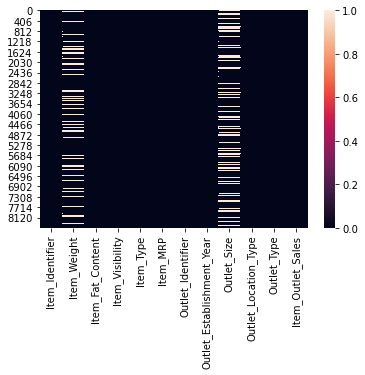

In [6]:
#using heatmap for checking null values
sn.heatmap(df.isnull())

In [7]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
#making a categorical group for analysis
categorical=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        categorical.append(x)

In [9]:
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#checking the value counts in all the object type variable
for col in categorical:
    print(col)
    print(df[col].value_counts())
    print()

Item_Identifier
FDG33    10
FDW13    10
FDD38     9
FDP25     9
NCI54     9
         ..
FDC23     1
FDK57     1
FDO33     1
DRF48     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In item fat_content columns the unique value Low Fat,LF,low fat is same, and regular and reg are same.

In [11]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
#creating missing variable 
mising = df['Item_Weight'].isnull()
mising

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
#replacing null values
for i, item in enumerate(df['Item_Identifier']):
    if mising[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [14]:
#checking null values
df['Item_Weight'].isnull().sum()

0

In [15]:
#pivot_table for outlet size by using mode
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
#replacing missing values
missing = df['Outlet_Size'].isnull()
df.loc[missing, 'Outlet_Size'] = df.loc[missing, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
#checking for null values
df['Outlet_Size'].isnull().sum()

0

In [18]:
#checking for item visiblity as no item can be visiblity with 0
sum(df['Item_Visibility']==0)

526

In [19]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [20]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
#taking first 2 character of item identifier column
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
#categorisng the values in food, non-consumable and drinks
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [25]:
df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Food,4
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Food,26
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Food,28
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,Food,11
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,Food,6


In [26]:
#droping Item_Identifier,Outlet_Establishment_Year
df.drop(["Item_Identifier","Outlet_Establishment_Year"], axis=1, inplace = True)
df.head(15)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
5,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,Food,4
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,Food,26
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,Food,28
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,Small,Tier 2,Supermarket Type1,1076.5986,Food,11
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,Small,Tier 2,Supermarket Type1,4710.5350,Food,6


# Univariate Analysis

<AxesSubplot:xlabel='New_Item_Type', ylabel='count'>

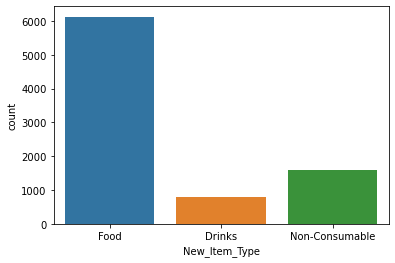

In [27]:
#New_Item_Type
sn.countplot("New_Item_Type", data=df)

The food item is the most selling product in the mart and the drinks are the least.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

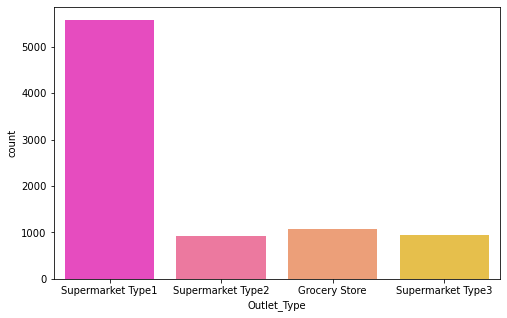

In [29]:
# Outlet Type
plt.figure(figsize=(8,5))
sn.countplot('Outlet_Type',data=df,palette='spring')

The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

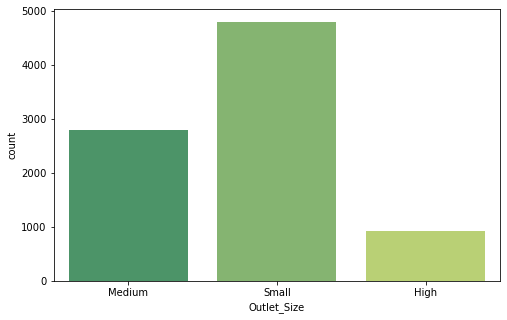

In [30]:
# Outlet_Size
plt.figure(figsize=(8,5))
sn.countplot('Outlet_Size',data=df,palette='summer')

There are alarge number of small outlet.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

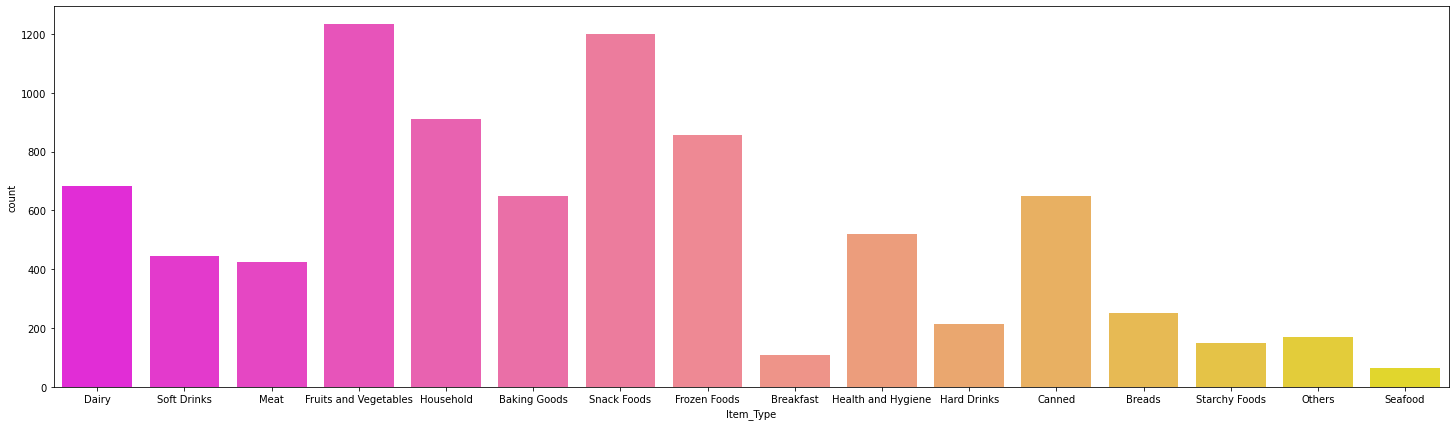

In [31]:
# Item Type
plt.figure(figsize=(25,7))
sn.countplot('Item_Type',data=df,palette='spring')

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.

Snack Foods too have good sales.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

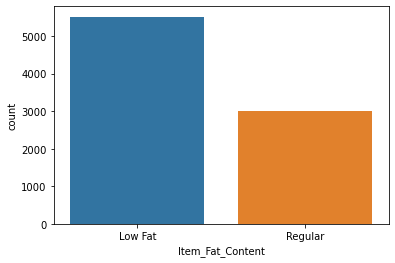

In [32]:
#item fat content
sn.countplot("Item_Fat_Content", data=df)

the coustomers prefer low fat items

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

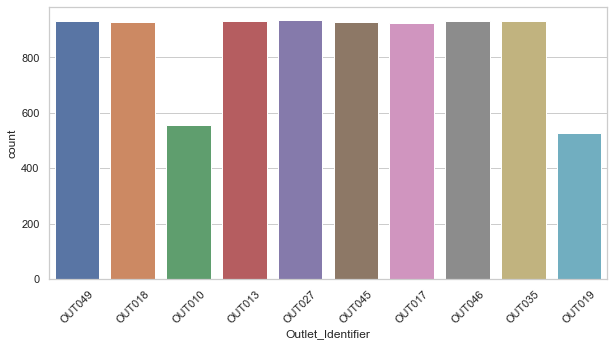

In [38]:
#outlet identifier
plt.figure(figsize=(10,5))
sn.countplot("Outlet_Identifier", data=df)
plt.xticks(rotation=45)

All the outlets are nearly equal in numbers except OUT010 and OUT019

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

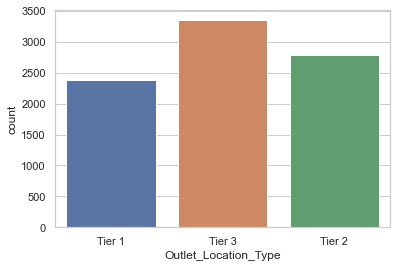

In [39]:
sn.countplot("Outlet_Location_Type", data=df)

there are more Tier 3 location

In [33]:
#creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sn.set(style = "whitegrid")
    sn.distplot(data_frame[feature_name],kde=True)

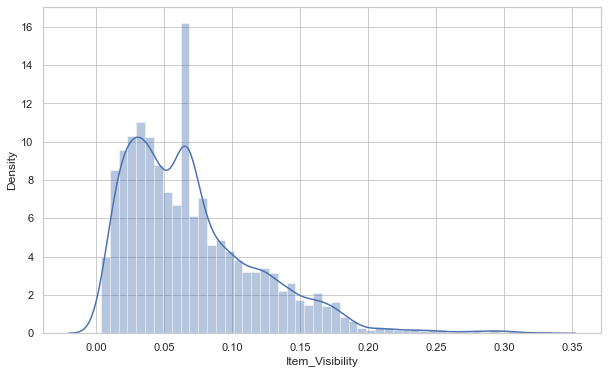

In [34]:
histogram(df,"Item_Visibility")

there is some outliers in the item visiblity

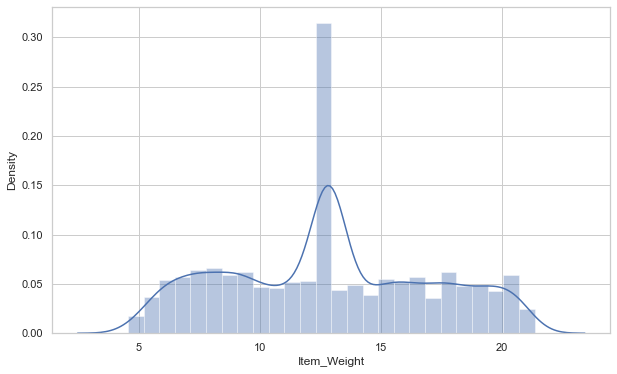

In [35]:
#item weight
histogram(df,"Item_Weight")

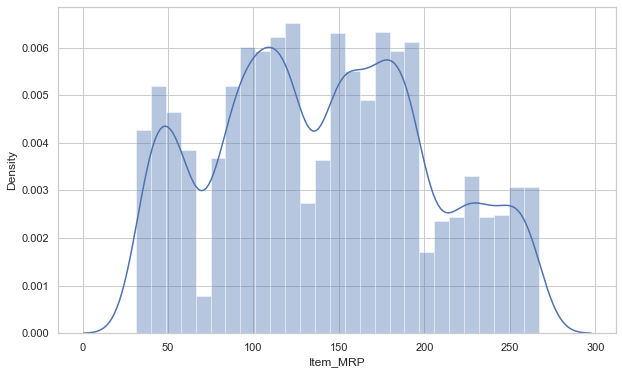

In [36]:
histogram(df,"Item_MRP")

most items MRP ranges from 80-200

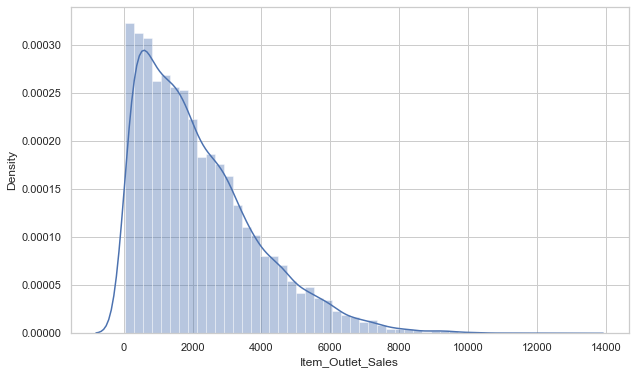

In [40]:
histogram(df,"Item_Outlet_Sales")

the graph is heavely right skewed

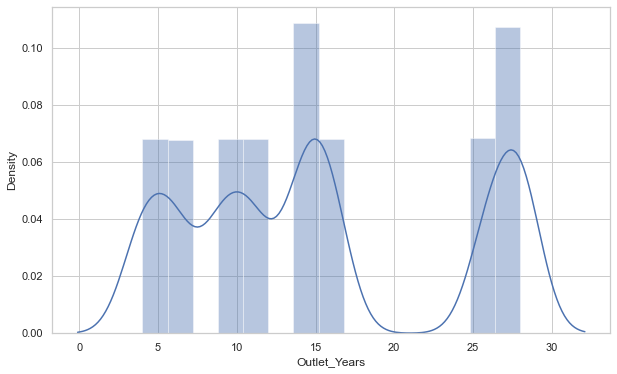

In [41]:
histogram(df,"Outlet_Years")

the age of the outlets in 2013 was between 5-27

# Bivariate Analysis

In [42]:
def barplot(variable):
    sn.barplot(x=variable, y="Item_Outlet_Sales", data=df)

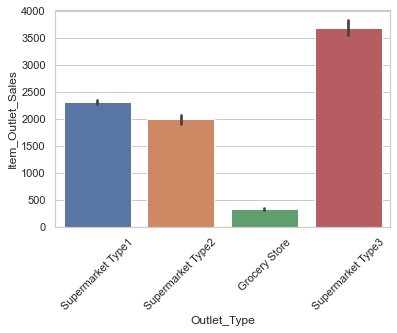

In [43]:
#Outlet_type/ Item_outlet sales
plt.xticks(rotation=45)
barplot("Outlet_Type")

Supermarket type 3 has has highest selling while grocery stores has least selling.

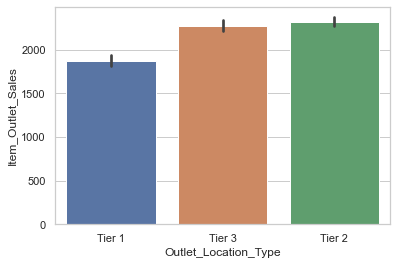

In [44]:
#outlet location types/ item outlets sales
barplot("Outlet_Location_Type")

In all the locations the sales is copartively equal.

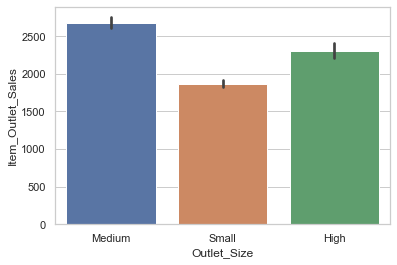

In [45]:
#outlet size/item outlet sales
barplot("Outlet_Size")

The outlet with medium size has hightest sellings however in small outlets the sellings is low, it can be the grocerry stores

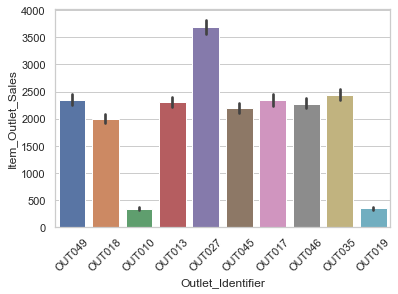

In [46]:
#outlet identifier/ item outlet sales
plt.xticks(rotation=45)
barplot("Outlet_Identifier")

The outlet OUT027 is selling more items while OUT010 and OUT019 sales very less

# Multivariate Analysis

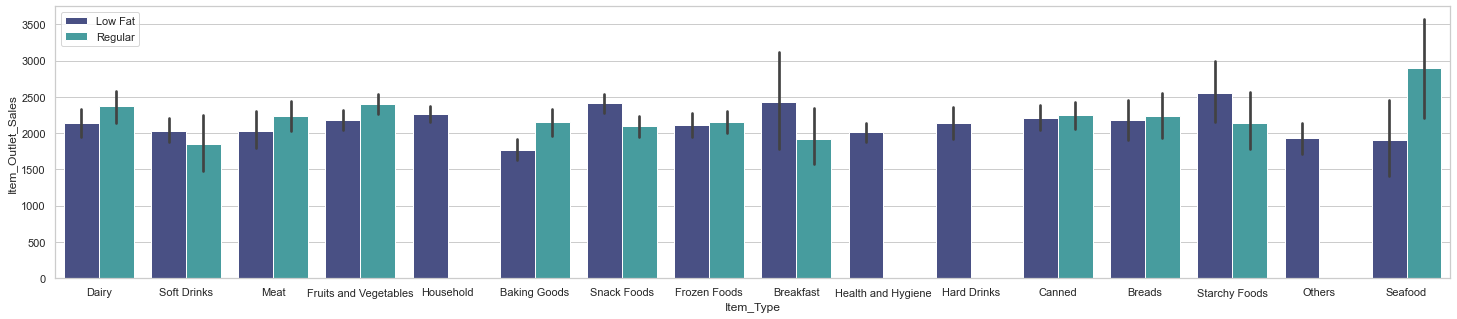

In [48]:
plt.figure(figsize=(25,5))
sn.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='mako')
plt.legend()

Mostly we have equal revenue generation from Fat and Regular Food Items.

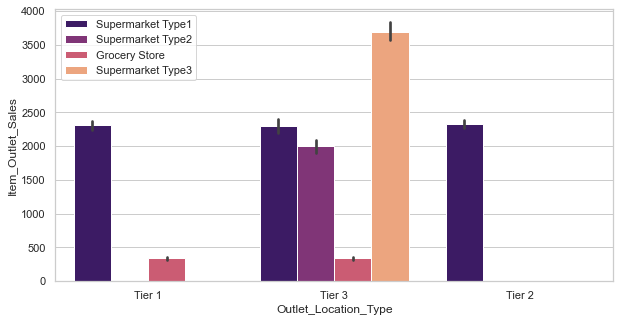

In [49]:
plt.figure(figsize=(10,5))
sn.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma')
plt.legend()

The Tier-3 location type has all types of Outlet type and has high sales margin.

In [50]:
#labeling the categorical values by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"].values)
df["Item_Type"]=le.fit_transform(df["Item_Type"].values)
df["Outlet_Type"]=le.fit_transform(df["Outlet_Type"].values)
df["Outlet_Size"]=le.fit_transform(df["Outlet_Size"].values)
df["Outlet_Location_Type"]=le.fit_transform(df["Outlet_Location_Type"].values)
df["New_Item_Type"]=le.fit_transform(df["New_Item_Type"].values)
df["Outlet_Identifier"]=le.fit_transform(df["Outlet_Identifier"].values)

# Outliers

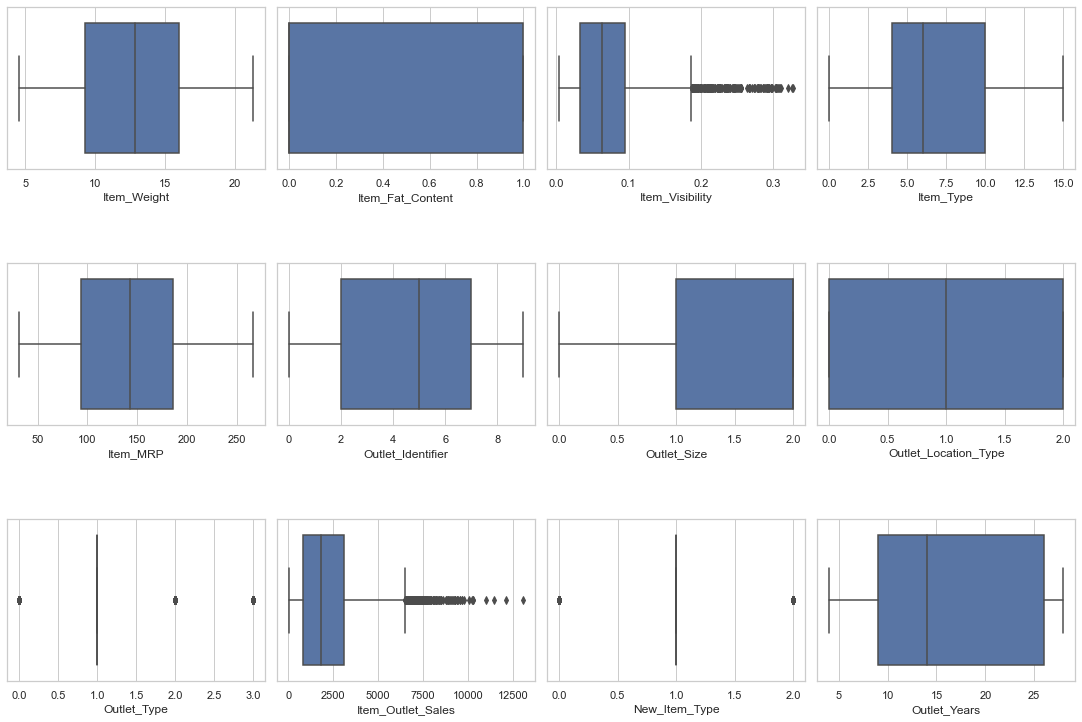

In [51]:
#ploting boxplot  for outliers
fig, ax=plt.subplots(ncols=4,nrows=3, figsize=(15,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [53]:
#the outliers in item_visibility is concentreted on upper fence amd is close to upper limit. 
#outlet types is a categorical value
#Item outlet sales is our dependent variable

# Skewness

In [54]:
#checking skewness
df.skew()

Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.286877
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.861866
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
New_Item_Type           0.114510
Outlet_Years            0.396641
dtype: float64

outliers and skewness is directly proportional we won't do any changes here also.

# Coorelation

<AxesSubplot:>

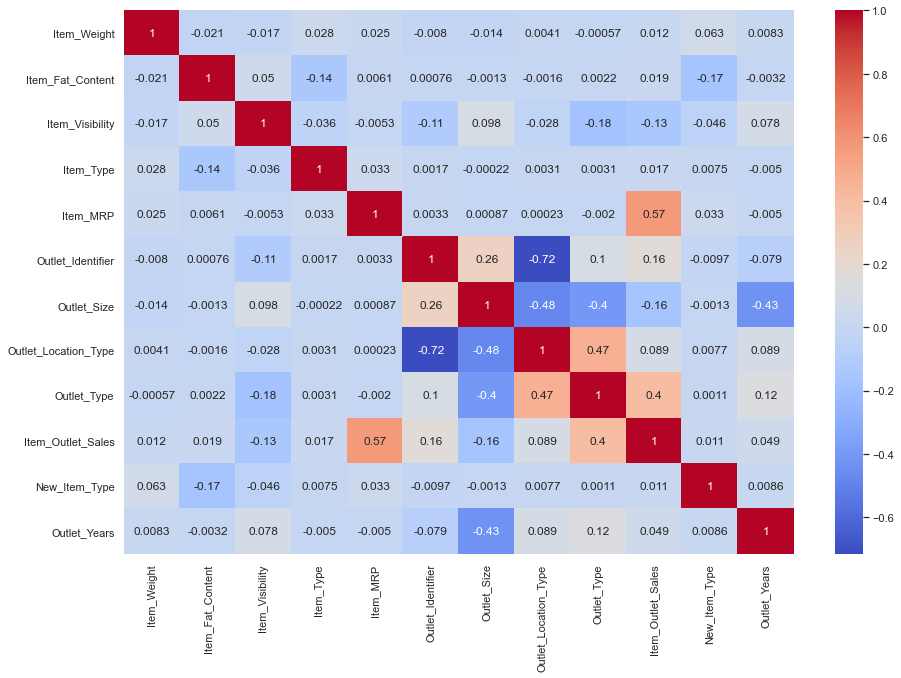

In [55]:
#checking correlation
plt.figure(figsize=(15,10))
corr = df.corr()
sn.heatmap(corr, annot=True, cmap='coolwarm')

the item outlet_sale is highly correlated with outlet_type and item_mrp

the item outlet_sale is negatively correlated with outlet type and outlet visibility

In [56]:
#creating x and y
x=df.drop("Item_Outlet_Sales", axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,9.300,0,0.016047,4,249.8092,9,1,0,1,1,14
1,5.920,1,0.019278,14,48.2692,3,1,2,2,0,4
2,17.500,0,0.016760,10,141.6180,9,1,0,1,1,14
3,19.200,1,0.066132,6,182.0950,0,2,2,0,1,15
4,8.930,0,0.066132,9,53.8614,1,0,2,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,1,26
8519,8.380,1,0.046982,0,108.1570,7,2,1,1,1,11
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,2,9
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1,4


In [57]:
y=df["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [58]:
x.shape, y.shape

((8523, 11), (8523,))

In [59]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [60]:
#spliting train test data
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
X_train.shape,y_train.shape,x_test.shape,y_test.shape

((5966, 11), (5966,), (2557, 11), (2557,))

In [61]:
#creating function 
def model(name):
    model=name()
    model.fit(X_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("""r2 score is:
    
    """,r2_score(y_test,predict))

In [62]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     1558703.6713071626
The mean absolute error is:  930.6358619765878
r2 score is:
    
     0.4837106842581457


In [63]:
print(cross_val_score(LinearRegression(),x,y,cv=5).mean())

0.5016299151784833


In [64]:
#lasso
model(Lasso)

mean squared error is:
     1558076.1452448536
The mean absolute error is:  930.4526238611212
r2 score is:
    
     0.48391853967497944


In [65]:
print(cross_val_score(Lasso(),x,y,cv=5).mean())

0.5015018754709855


In [66]:
#Decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     2440571.1271479228
The mean absolute error is:  1076.6491143527571
r2 score is:
    
     0.19160978417544272


In [67]:
print(cross_val_score(DecisionTreeRegressor(),x,y,cv=5).mean())

0.13737707496599944


In [68]:
#Randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     1372545.1395597507
The mean absolute error is:  810.2755092506844
r2 score is:
    
     0.545371962629793


In [69]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=5).mean())

0.5431175918885671


In [70]:
#ridge
model(Ridge)

mean squared error is:
     1558437.2784495903
The mean absolute error is:  930.572052693343
r2 score is:
    
     0.4837989215470456


In [71]:
print(cross_val_score(Ridge(),x,y,cv=5).mean())

0.5016286029806245


# Randomforestregressor is the best model.

# Hyper parameter Tunning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'max_features': 'log2', 'n_estimators': 100}




In [80]:
#best model with best parameters
best_model=RandomForestRegressor(max_features='log2',n_estimators=100)
best_model.fit(X_train,y_train)
predict=best_model.predict(x_test)
print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
print("""r2 score is:
    
    """,r2_score(y_test,predict))

mean squared error is:
     1358696.212371445
The mean absolute error is:  808.1565206828315
r2 score is:
    
     0.5499591418822887


# Saving The Model

In [83]:
import joblib
joblib.dump(best_model,"BigdatamartPrediction.pkl")

['BigdatamartPrediction.pkl']

# Test dataset

In [106]:
#test data
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [87]:
#checking for null values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [88]:
# fill the missing values
#using pivot table fill item weight
item_weight_mean = test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [89]:
#creating missing variable 
missing = test['Item_Weight'].isnull()
missing

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [90]:
#replacing null values
for i, item in enumerate(test['Item_Identifier']):
    if missing[i]:
        if item in item_weight_mean:
            test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test['Item_Weight'][i] = np.mean(test['Item_Weight'])

In [91]:
#checking null values
test['Item_Weight'].isnull().sum()

0

In [92]:
outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [93]:
missing = test['Outlet_Size'].isnull()
test.loc[missing, 'Outlet_Size'] = test.loc[missing, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [94]:
test['Outlet_Size'].isnull().sum()

0

In [95]:
sum(test['Item_Visibility']==0)

353

In [96]:
# replace zeros with mean
test.loc[:, 'Item_Visibility'].replace([0], [test['Item_Visibility'].mean()], inplace=True)

In [97]:
#combine item fat content
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [98]:
#taking first 2 character of item identifier column
test['New_Item_Type'] = test['Item_Identifier'].apply(lambda x: x[:2])
test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [99]:
test['New_Item_Type'] = test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [100]:
# create small values for establishment year
test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']
test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [101]:
test.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumable,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,Food,16
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food,4
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1,Food,11
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6


In [102]:
test["Item_Fat_Content"]=le.fit_transform(test["Item_Fat_Content"].values)
test["Item_Type"]=le.fit_transform(test["Item_Type"].values)
test["Outlet_Type"]=le.fit_transform(test["Outlet_Type"].values)
test["Outlet_Size"]=le.fit_transform(test["Outlet_Size"].values)
test["Outlet_Location_Type"]=le.fit_transform(test["Outlet_Location_Type"].values)
test["New_Item_Type"]=le.fit_transform(test["New_Item_Type"].values)
test["Outlet_Identifier"]=le.fit_transform(test["Outlet_Identifier"].values)

In [103]:
test.drop(["Item_Identifier","Outlet_Establishment_Year"], axis=1, inplace = True)
test.head(15)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,20.750000,0,0.007565,13,107.8622,9,1,0,1,1,14
1,8.300000,1,0.038428,4,87.3198,2,2,1,1,1,6
2,14.600000,0,0.099575,11,241.7538,0,2,2,0,2,15
3,7.315000,0,0.015388,13,155.0340,2,2,1,1,1,6
4,12.695633,1,0.118599,4,234.2300,5,1,2,3,1,28
5,9.800000,1,0.063817,6,117.1492,8,2,0,1,1,16
6,19.350000,1,0.082602,0,50.1034,3,1,2,2,1,4
7,12.695633,0,0.015782,0,81.0592,5,1,2,3,1,28
8,6.305000,1,0.123365,13,95.7436,7,2,1,1,1,11
9,5.985000,0,0.005698,0,186.8924,2,2,1,1,1,6


In [104]:
test.shape

(5681, 11)

In [105]:
#pedicting test result
predict=best_model.predict(test)
predict

array([1852.581842, 1378.951696,  771.236088, ..., 1645.484752,
       3830.587088, 1471.331446])